In [1]:
# Python library and module imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py
import torch

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils

# WatChMaL imports
from io_utils.data_handling_2 import WCH5Dataset

# PyTorch imports
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

from collections import Counter 

### Use the watchmal WCH5Dataset handler to load the dataset

In [2]:
train_batch_size = 1024

In [40]:
dset=WCH5Dataset("/fast_scratch/NuPRISM_4pi_full_tank_grid/out.h5", 0.1, 0.1, reduced_dataset_size=1000000)

In [41]:
train_loader = DataLoader(dset, batch_size=train_batch_size, shuffle=False,
                          pin_memory=True, sampler=SubsetRandomSampler(dset.train_indices))

### Iterate over the dataset and collect the positions per example

In [42]:
labels = []
positions = []

for data in iter(train_loader):
    labels.append(data[1].numpy())
    positions.append(data[5].numpy())

KeyboardInterrupt: 

In [ ]:
print(len(labels), labels[0].shape,
      len(positions), positions[0].shape)

In [16]:
labels = np.concatenate(labels, axis=0)
positions = np.concatenate(positions, axis=0)

In [17]:
print(labels.shape, positions.shape)

(80000,) (80000, 1, 3)


### Check the distribution of labels

In [18]:
labels = labels.reshape(-1)
print(Counter(labels))

Counter({1: 26798, 0: 26746, 2: 26456})


### Plot the per label position $r$ distribution

In [25]:
label_dict = {0:["gamma","red"], 1:["e","blue"], 2:["mu","green"]}

In [ ]:
positions = positions.reshape(-1, positions.shape[2])

In [26]:
rs = np.array([math.sqrt(position[0]**2 + position[1]**2 + position[2]**2) for position in positions])

In [27]:
print(rs.shape)

(80000,)


Text(0.5, 0, 'Position, $r = \\sqrt{x^2 + y^2 + z^2}$')

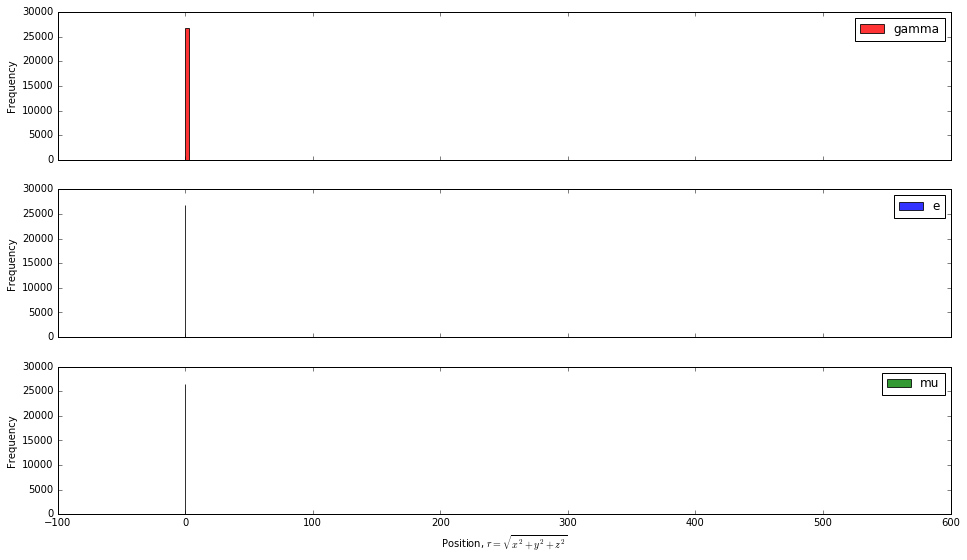

In [29]:
rs_dict = {}
for label in label_dict.keys():
    rs_dict[label] = rs[labels == label]
    
fig, axes = plt.subplots(3, 1, figsize=(16,9), sharex=True)

for label in rs_dict.keys():
    axes[label].hist(rs_dict[label], bins=200, density=False, label=label_dict[label][0], alpha=0.8,
                     color=label_dict[label][1])
    axes[label].legend()
    axes[label].set_ylabel("Frequency")
    
plt.xlabel(r"Position, $r = \sqrt{x^2 + y^2 + z^2}$")

### Plot the per label position component distributions

In [35]:
print(len(positions[labels == 0]))

26746


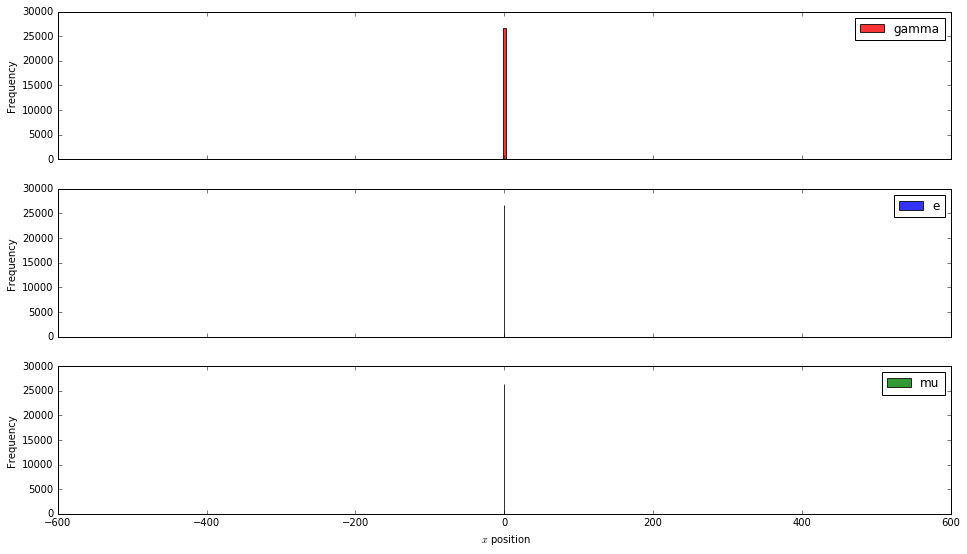

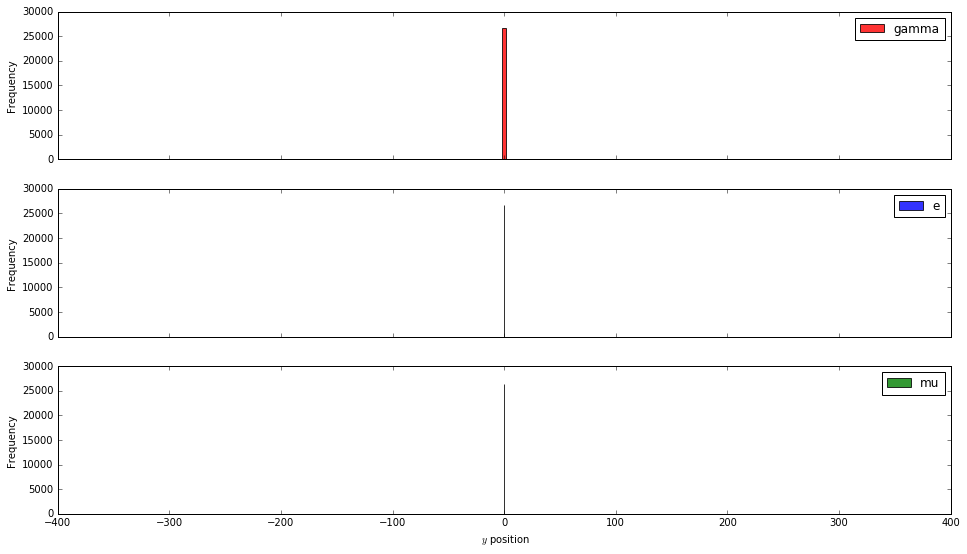

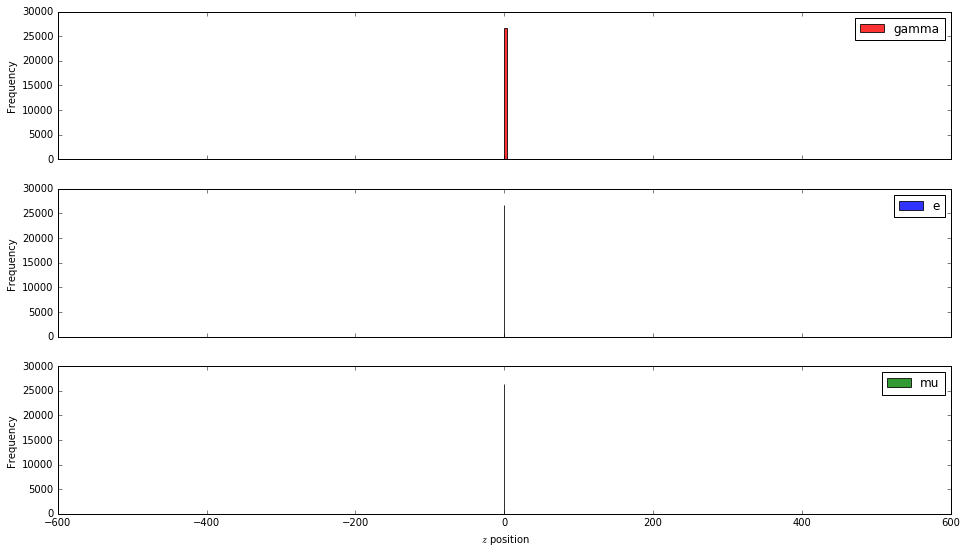

In [39]:
pos_x_dict = {}
pos_y_dict = {}
pos_z_dict = {}

for label in label_dict.keys():
    pos_x_dict[label] = positions[labels == label][:,0]
    pos_y_dict[label] = positions[labels == label][:,1]
    pos_z_dict[label] = positions[labels == label][:,2]

for pos_dict, axis in zip([pos_x_dict, pos_y_dict, pos_z_dict], ["x", "y", "z"]):
    fig, axes = plt.subplots(3, 1, figsize=(16,9), sharex=True)
    for label in label_dict.keys():
        axes[label].hist(pos_dict[label], bins=200, density=False, label=label_dict[label][0], alpha=0.8,
                         color=label_dict[label][1])
        axes[label].legend()
        axes[label].set_ylabel("Frequency")
    plt.xlabel(r" ${0}$ position".format(axis))
    plt.show()